<a href="https://colab.research.google.com/github/Dhruv-Ganapati/Advance-Heart-Disease-Study/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Header: Emotion Detection:

### Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/AI-Udemy/Bonus Projects/Affectiva AI

/content/drive/MyDrive/Colab Notebooks/AI-Udemy/Bonus Projects/Affectiva AI


In [3]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import *
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers

from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [6]:
df.head(5)

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [7]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [9]:
df.describe().T

count       mean       std        min        25%  \
left_eye_center_x          2140.0  66.221549  2.087683  47.835757  65.046300   
left_eye_center_y          2140.0  36.842274  2.294027  23.832996  35.468842   
right_eye_center_x         2140.0  29.640269  2.051575  18.922611  28.472224   
right_eye_center_y         2140.0  37.063815  2.234334  24.773072  35.818377   
left_eye_inner_corner_x    2140.0  59.272128  2.005631  41.779381  58.113054   
left_eye_inner_corner_y    2140.0  37.856014  2.034500  27.190098  36.607950   
left_eye_outer_corner_x    2140.0  73.412473  2.701639  52.947144  71.741978   
left_eye_outer_corner_y    2140.0  37.640110  2.684162  26.250023  36.102409   
right_eye_inner_corner_x   2140.0  36.603107  1.822784  24.112624  35.495730   
right_eye_inner_corner_y   2140.0  37.920852  2.009505  26.250023  36.766783   
right_eye_outer_corner_x   2140.0  22.361617  2.768804  11.054589  20.631964   
right_eye_outer_corner_y   2140.0  38.034571  2.654903  26.521633  36.569765   
left_eyebrow_inner_end_x   2140.0  56.147991  2.819914  35.581733  54.562757   
left_eyebrow_inner_end_y   2140.0  29.222304  2.867131  15.859361  27.590944   
left_eyebrow_outer_end_x   2140.0  79.617523  3.312647  55.549929  77.732395   
left_eyebrow_outer_end_y   2140.0  29.656570  3.627187  10.522325  27.658656   
right_eyebrow_inner_end_x  2140.0  39.272084  2.609648  25.060327  37.555192   
right_eyebrow_inner_end_y  2140.0  29.413747  2.842219  16.476000  27.798773   
right_eyebrow_outer_end_x  2140.0  15.761707  3.337901   3.826243  13.540535   
right_eyebrow_outer_end_y  2140.0  30.452947  3.644342  13.224453  28.268263   
nose_tip_x                 2140.0  47.952141  3.276053  24.472590  46.495330   
nose_tip_y                 2140.0  57.253926  4.528635  41.558400  54.466000   
mouth_left_corner_x        2140.0  63.419076  3.650131  43.869480  61.341291   
mouth_left_corner_y        2140.0  75.887660  4.438565  57.023258  72.874263   
mouth_right_corner_x       2140.0  32.967365  3.595103   9.778137  30.879288   
mouth_right_corner_y       2140.0  76.134065  4.259514  56.690208  73.280038   
mouth_center_top_lip_x     2140.0  48.081325  2.723274  32.260312  46.580004   
mouth_center_top_lip_y     2140.0  72.681125  5.108675  56.719043  69.271669   
mouth_center_bottom_lip_x  2140.0  48.149654  3.032389  33.047605  46.492000   
mouth_center_bottom_lip_y  2140.0  82.630412  4.813557  57.232296  79.417480   

                                 50%        75%        max  
left_eye_center_x          66.129065  67.332093  78.013082  
left_eye_center_y          36.913319  38.286438  46.132421  
right_eye_center_x         29.655440  30.858673  42.495172  
right_eye_center_y         37.048085  38.333884  45.980981  
left_eye_inner_corner_x    59.327154  60.521492  69.023030  
left_eye_inner_corner_y    37.845220  39.195431  47.190316  
left_eye_outer_corner_x    73.240045  74.978684  87.032252  
left_eye_outer_corner_y    37.624207  39.308331  49.653825  
right_eye_inner_corner_x   36.620735  37.665280  47.293746  
right_eye_inner_corner_y   37.920336  39.143921  44.887301  
right_eye_outer_corner_x   22.529600  24.202338  40.050971  
right_eye_outer_corner_y   37.876900  39.401034  50.002113  
left_eyebrow_inner_end_x   56.239984  57.926361  67.752000  
left_eyebrow_inner_end_y   29.468466  31.079433  40.293408  
left_eyebrow_outer_end_x   79.797607  81.559651  94.269957  
left_eyebrow_outer_end_y   29.753523  31.763791  48.823425  
right_eyebrow_inner_end_x  39.247681  40.824154  51.300571  
right_eyebrow_inner_end_y  29.528098  31.134740  39.445859  
right_eyebrow_outer_end_x  15.760876  17.871569  39.676082  
right_eyebrow_outer_end_y  30.333323  32.661300  44.857962  
nose_tip_x                 47.900511  49.260657  65.279654  
nose_tip_y                 57.638582  60.303524  75.992731  
mouth_left_corner_x        63.199057  65.302398  84.767123  
mouth_left_corner_y        75.682465  78.774969  94.673637  
mouth_right_corner_x  

Here, 30 columns are Floating type data set and Remaining 1 data set is image(Object type).

Images contains values of it's color.
* 0 : represent full balck object
* 255: represent white image object
* Between 0-255: represent Gray-scale image.

In [10]:
df['Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
2135    191 191 191 190 189 185 184 120 54 34 19 24 31...
2136    19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137    31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138    7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139    68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...
Name: Image, Length: 2140, dtype: object

In [11]:
df['Image'].shape

(2140,)

In [12]:
df['Image'].size

2140

In [13]:
# Since values for the image are given as space separated string, separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96, 96)
df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep=' ').reshape(96,96))

In [14]:
df['Image'][0].shape

(96, 96)

MINI CHALLENGE #1:
- Obtain the average, minimum and maximum values for 'right_eye_center_x'

In [15]:
df['right_eye_center_x'].describe()

count    2140.000000
mean       29.640269
std         2.051575
min        18.922611
25%        28.472224
50%        29.655440
75%        30.858673
max        42.495172
Name: right_eye_center_x, dtype: float64

### ==========================================================

# PERFORM IMAGE VISUALIZATION

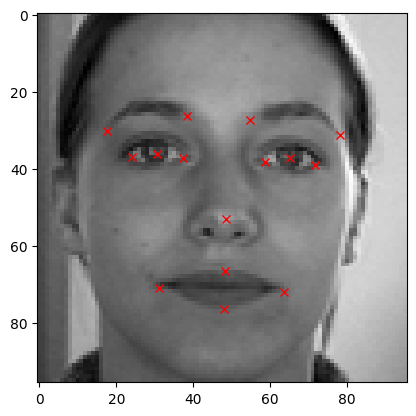

In [16]:
# Plot a random image from the dataset along with facial keypoints.
# Image data is obtained from df['Image'] and plotted using plt.imshow
# 15 x and y coordinates for the corresponding image
# since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
# we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.

np.random.seed(78)    # For same image, seed helps to provide same  random value everytime
i = np.random.randint(1, len(df))
plt.imshow(df['Image'][i], cmap='gray')
for j in range(1,31,2):
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

* <!-- i =[]
for j in range(1, 31, 2):
  i.append(j)
  print(i) -->

I:  [1943, 40, 541, 78, 2091, 708, 148, 1110, 1638, 1015, 1027, 1062, 1497, 578, 1613, 1182]


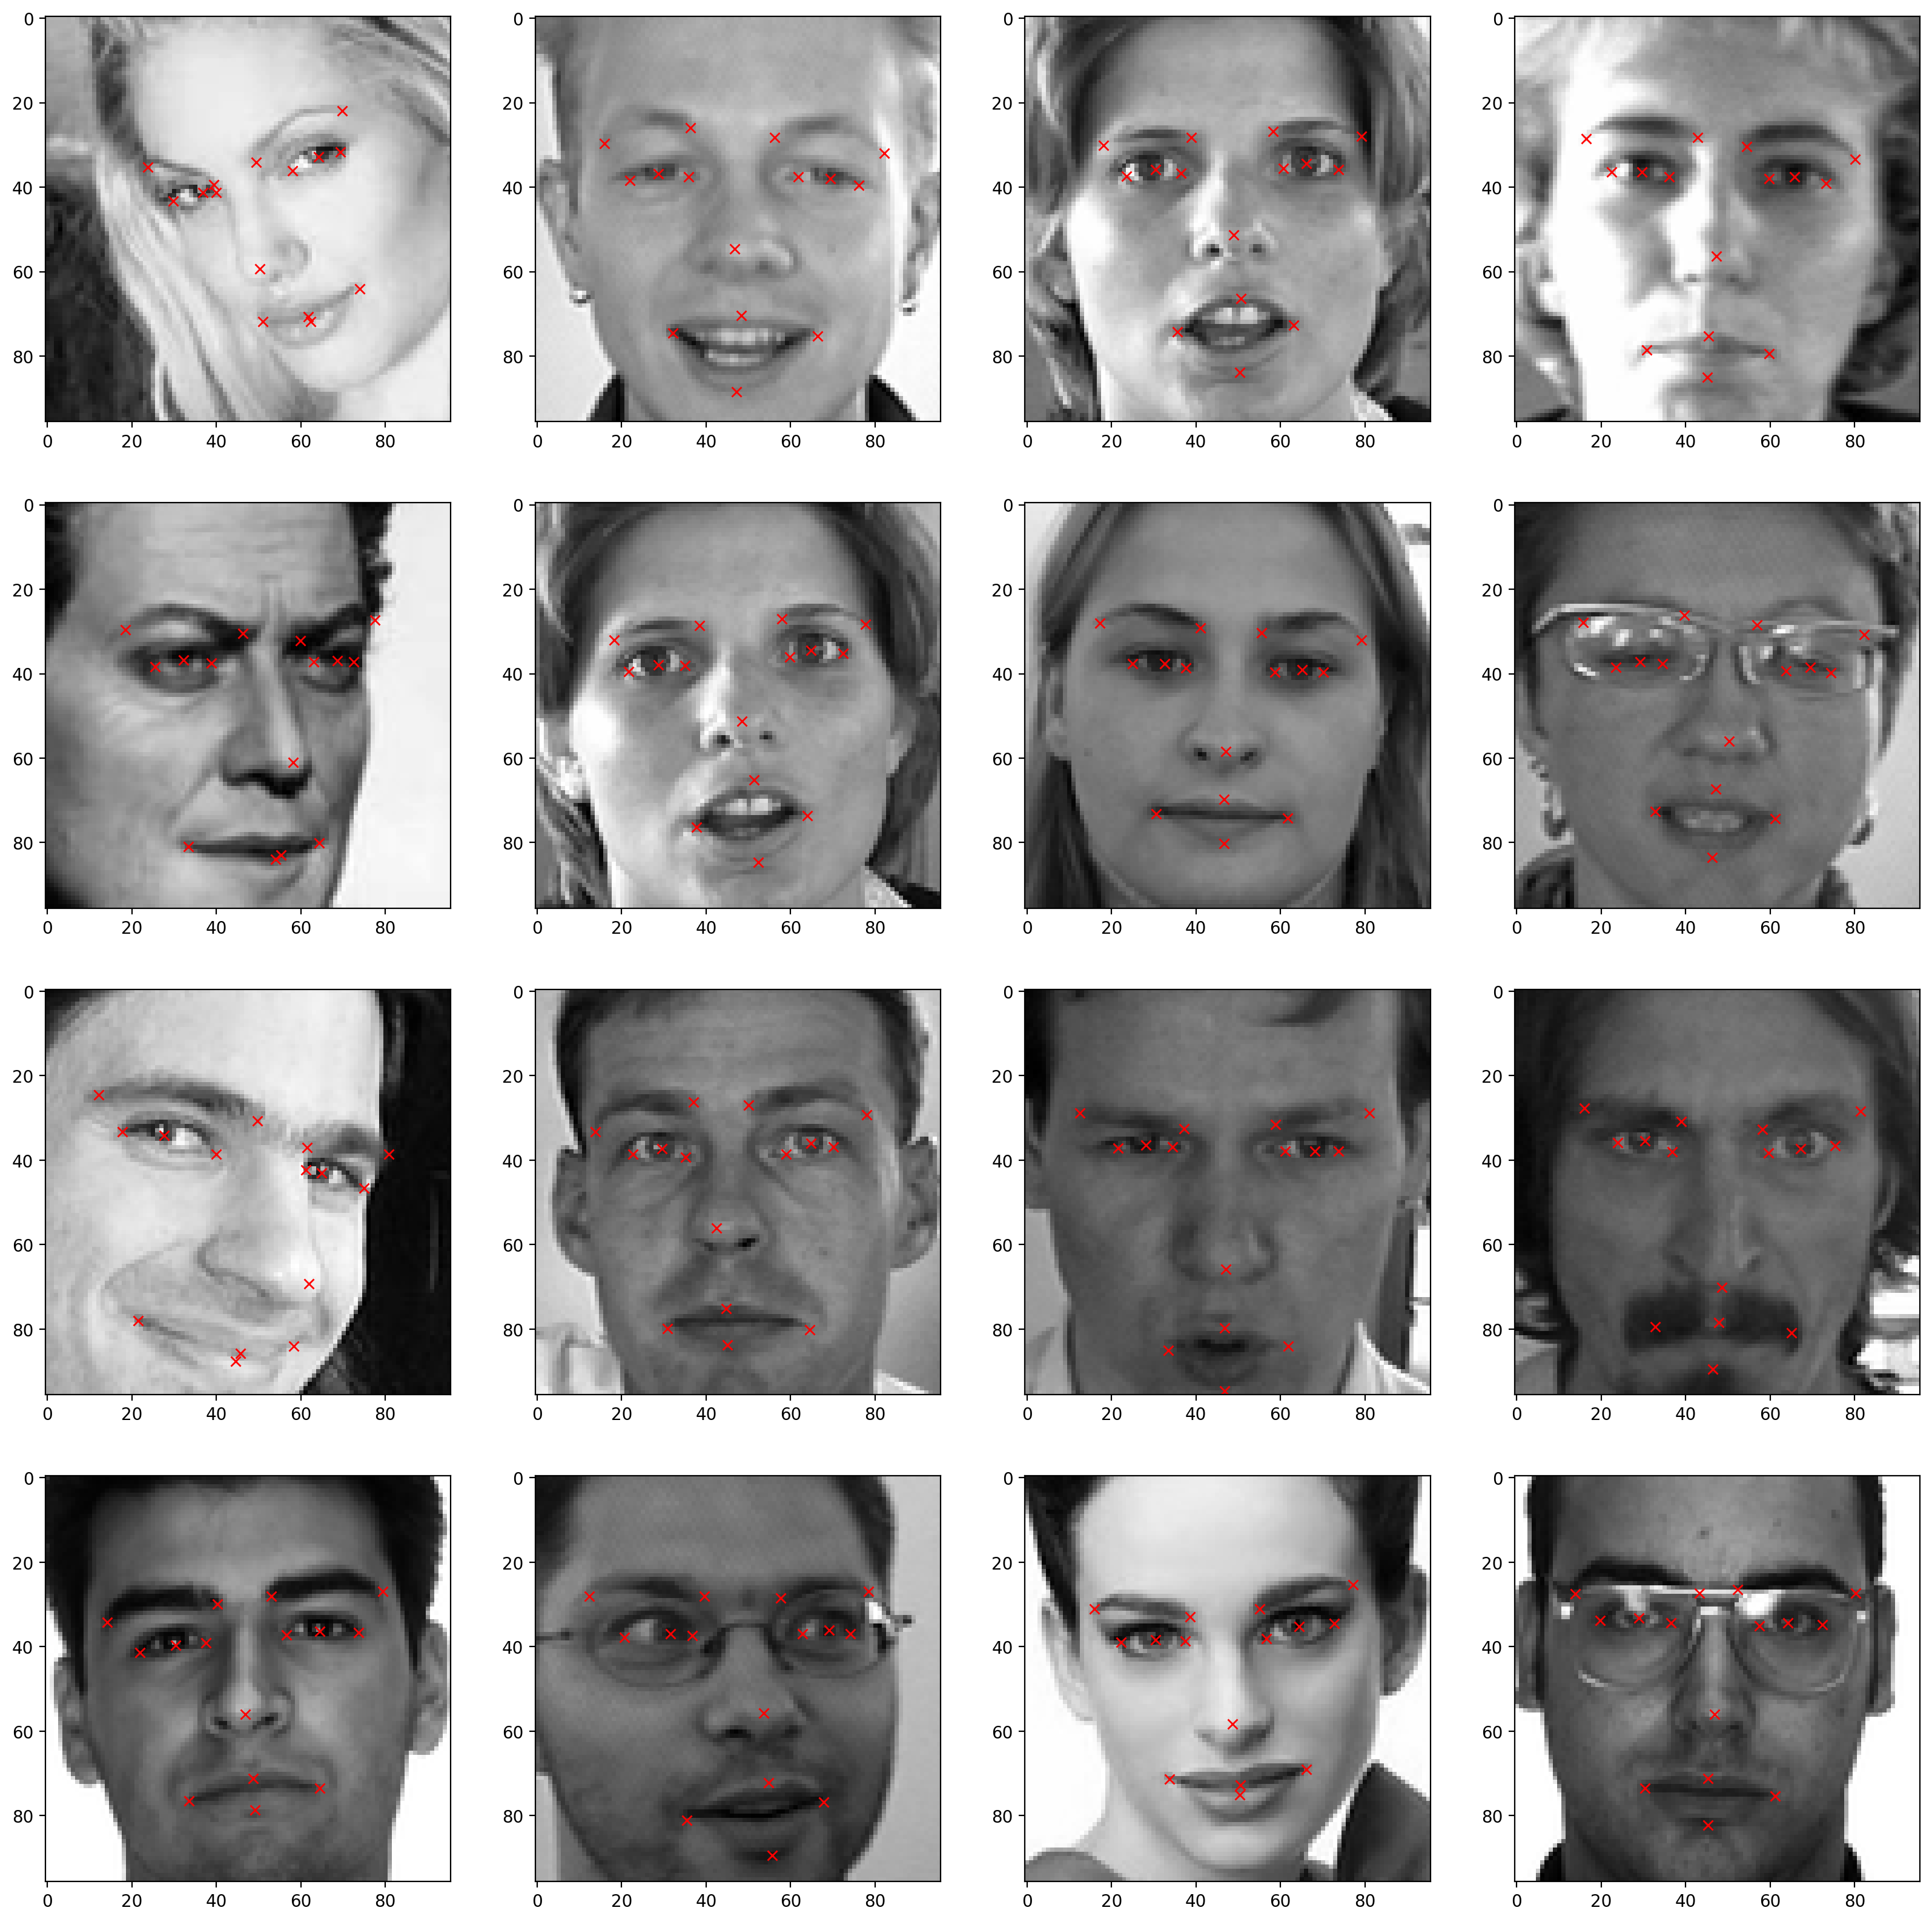

In [17]:
#View more images in grid format
fig = plt.figure(figsize=(20,20),dpi=200)

i=[]
# for m in range(16):
#   i.append(np.random.randint(m,len(df)))    # Generate random images and stores on I[] list

# Generate 16 unique random numbers
while len(i) < 16:
    random_number = np.random.randint(0, len(df))  # Generate a random number
    if random_number not in i:   # Check if the number is unique
        i.append(random_number)  # Append unique random number
print("I: ", i)

for a in range(16):
  ax = fig.add_subplot(4,4,a+1)           # provide 16 empty image boxes
  a = i[a]                        # Putting random images loc on loop
  image = plt.imshow(df["Image"][a], cmap='gray')   # FIll all the related images on the boxes
  for j in range(1, 31, 2):
    plt.plot(df.loc[a][j-1], df.loc[a][j], 'rx')     # Fill the red 'x' facial point.


MINI CHALLENGE #2:
- Perform a sanity check on the data by randomly visualizing 64 new images along with their cooresponding key points

[163, 101, 2005, 322, 340, 1629, 2124, 1206, 1928, 276, 2108, 1505, 1900, 352, 1321, 895, 1598, 1382, 422, 1190, 1166, 1690, 909, 665, 1964, 1292, 2004, 1108, 1726, 2120, 179, 482, 81, 109, 1515, 1674, 467, 1342, 1974, 23, 643, 1365, 122, 762, 2039, 1938, 492, 1424, 989, 1806, 677, 1534, 1097, 1022, 465, 549, 1911, 250, 578, 1817, 1251, 319, 1925, 874]


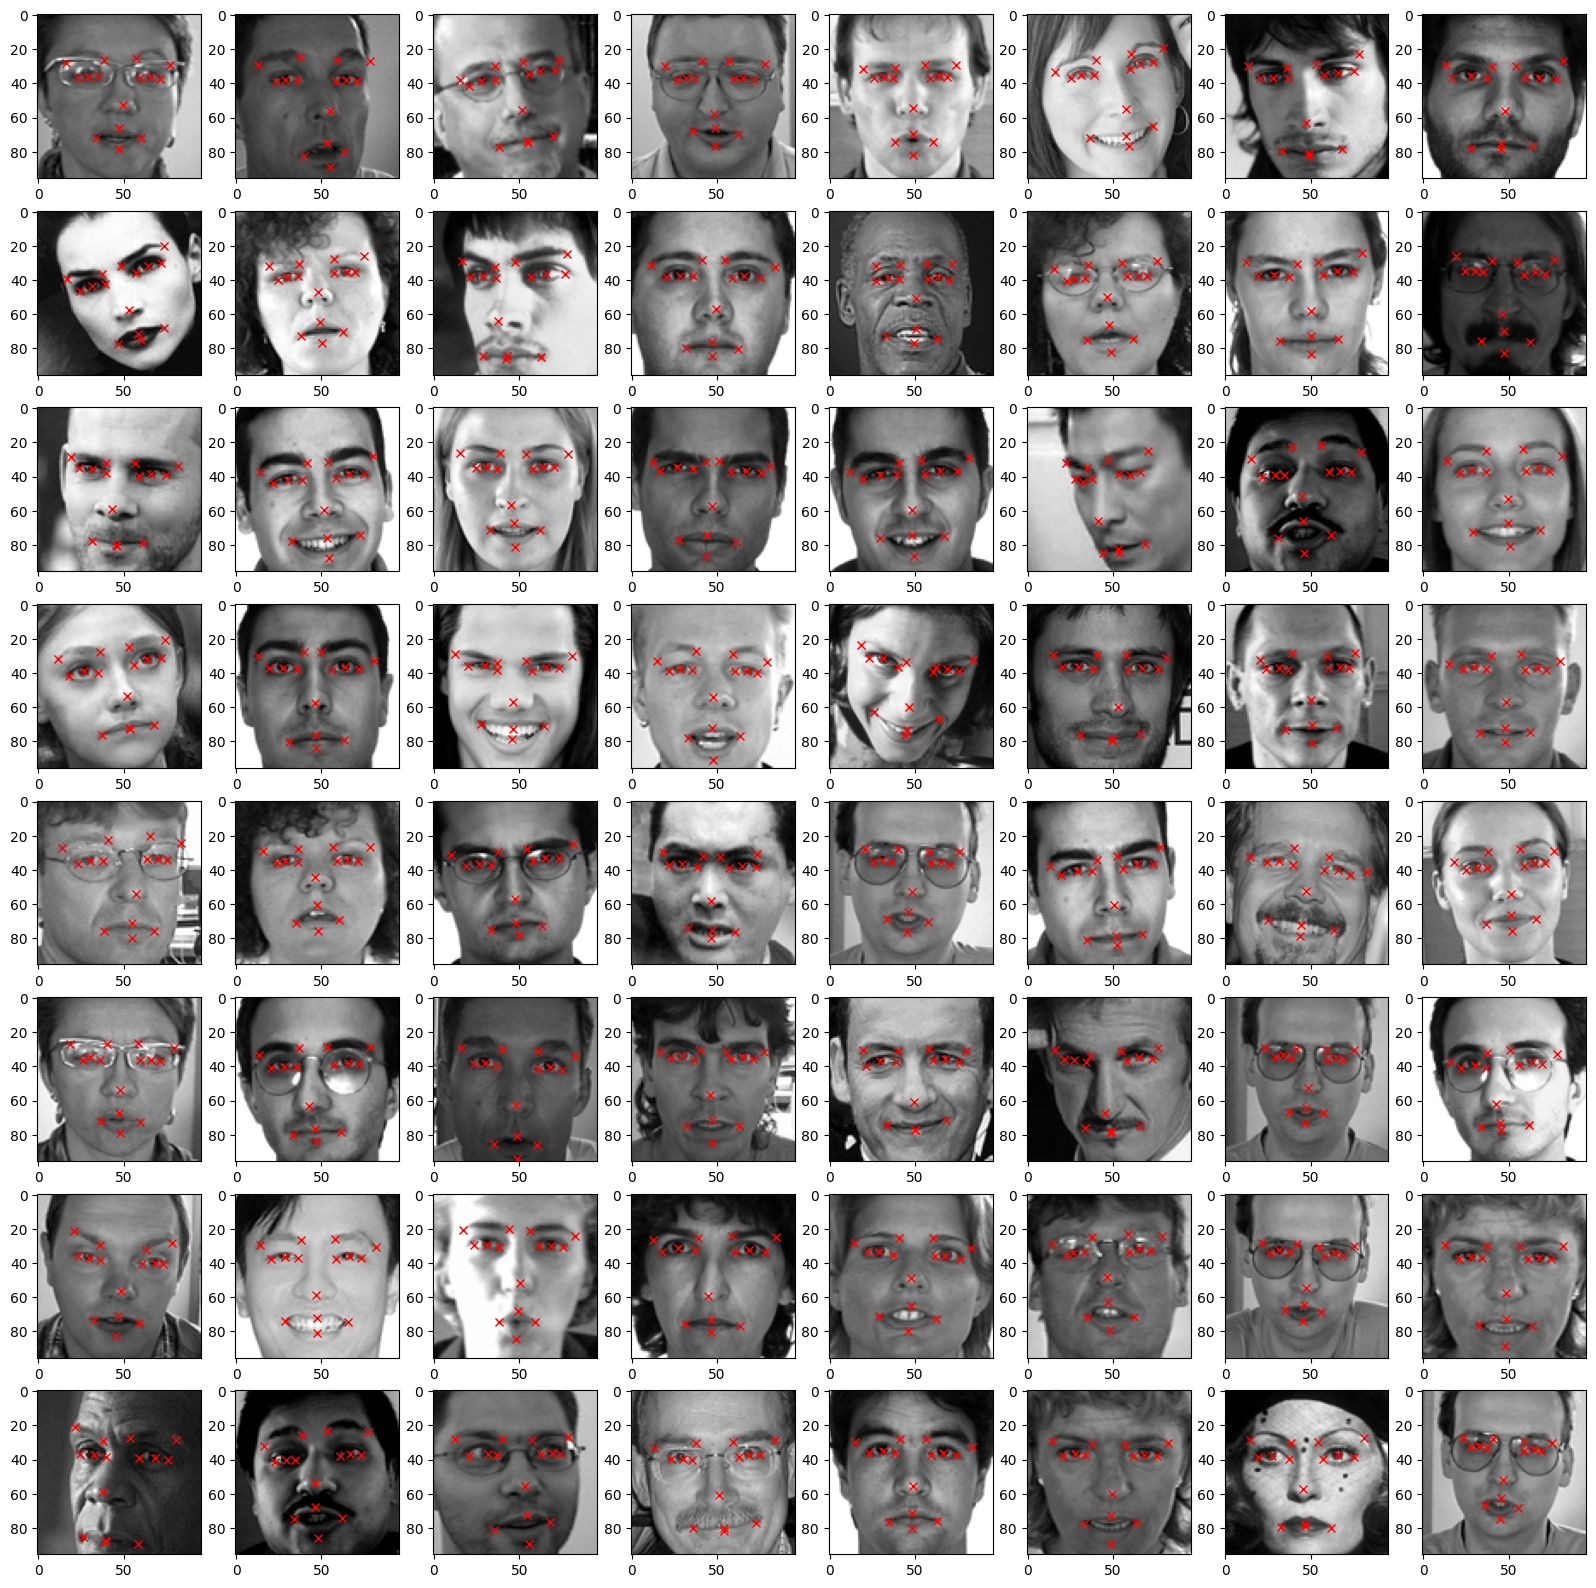

In [18]:
import random

fig = plt.figure(figsize=(20,20))

x = []
while len(x) < 64:
  random_number = np.random.randint(0, len(df))
  if random_number not in x:
    x.append(random_number)

print(x)    # Generated 64 unique random number from data frame

for a in range(64):
  ax = fig.add_subplot(8,8, a+1)        # Here, 8,8 is 8 rows * 8 columns
  a = x[a]
  image = plt.imshow(df['Image'][a], cmap='gray')
  for j in range(1,31,2):
    plt.plot(df.loc[a][j-1], df.loc[a][j], 'rx')

# PERFORM IMAGE AUGMENTATION
Image augmentation is a technique commonly used in deep learning for computer vision tasks, such as image classification, object detection, and segmentation. It involves applying various transformations to the original images in the training dataset to create new training examples.
Some common image augmentation techniques include:

* Rotation: Rotating the image by a certain angle.
* Flip: Flipping the image horizontally or vertically.
* Zoom: Zooming in or out of the image.
* Translation: Shifting the image horizontally or vertically.
* Brightness adjustment: Changing the brightness level of the image.
* Contrast adjustment: Adjusting the contrast of the image.
* Noise injection: Adding random noise to the image.
* Crop and resize: Cropping a portion of the image and resizing it to the original size.
* Shear: Applying shearing transformations to the image.

In [19]:
import copy
copy_df = copy.copy(df)

Generalization of model is very important than memorization. One can't memorise all the thing.

In [20]:
# showing all the key facial point of the dataFrame
columns = copy_df.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

###**Horizontal Flip**

In [21]:
# Fliping image Horizontally
copy_df['Image'] = copy_df['Image'].apply(lambda x:np.flip(x, axis=1))

##since we are fliping Horizonatlly, y co-ordinates values would be the same.
# Only x-coordinates values would change, all we have to do is to substract our initial x-coordinates values form width of the image(96*96)
for i in range(len(columns)):
  if i%2 == 0:          # only even means: x-coordinates
    copy_df[columns[i]] = copy_df[columns[i]].apply(lambda x: 96.0 -float(x))      # 96 pixels -( x-cordinates)value


In [22]:
df['left_eye_center_x']

0       66.033564
1       64.332936
2       65.057053
3       65.225739
4       66.725301
          ...    
2135    67.180378
2136    65.724490
2137    68.430866
2138    64.152180
2139    66.683755
Name: left_eye_center_x, Length: 2140, dtype: float64

In [23]:
# Here value = 96 - df(value)
copy_df['left_eye_center_x']

0       29.966436
1       31.667064
2       30.942947
3       30.774261
4       29.274699
          ...    
2135    28.819622
2136    30.275510
2137    27.569134
2138    31.847820
2139    29.316245
Name: left_eye_center_x, Length: 2140, dtype: float64

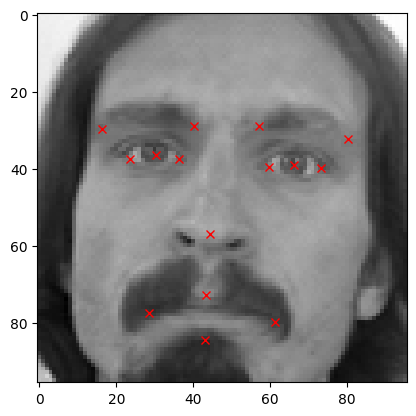

In [24]:
# Showing the original images as:
plt.imshow(df['Image'][0], cmap='gray')
for j in range(1, 31, 2):
  plt.plot(df.loc[0][j-1], df.loc[0][j], 'rx')

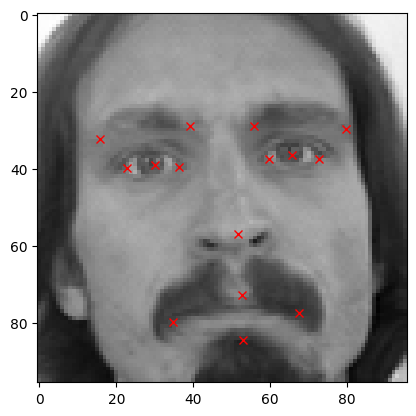

In [25]:
# Showing the Flipped image = Horizontal flipped image
plt.imshow(copy_df['Image'][0], cmap='gray')
for j in range(1, 31, 2):
  plt.plot(copy_df.loc[0][j-1], copy_df.loc[0][j], 'rx')

**Augmented DataFrame** -concate(original + Horizontally flipped data)
* Note: The more we do augmentation, the data become more complicated.


Here we increase the brightness fo this image.

In [26]:
  augmented_df = np.concatenate((df, copy_df))

In [27]:
augmented_df.shape

(4280, 31)

**Brightness: Increase**
* np.clip: "Here CLIP helps to bring pixels values to the range between 0.0 to 255.0, if the pixel values goes out of range.
      * For eg: suppose x=200 pix
        then 200 * 2 = 400 pix which is out of range(0-255). Then np.CLIP bring it between range.

In [28]:
# Randomly increasing the brightness of the image
# We multiply pixel values by random values range(1.5 -2.0) to incease the brightness
# We can clip the value between 0-255
import random

copy_df = copy.copy(df)

In [29]:
copy_df['Image'] = copy_df['Image'].apply(lambda x:np.clip(random.uniform(1.5,2)*x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, copy_df))
augmented_df.shape

(6420, 31)

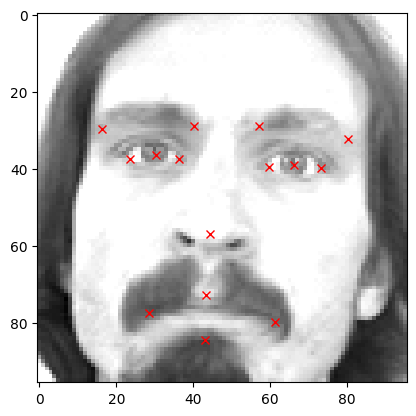

In [30]:
# show the image
plt.imshow(copy_df['Image'][0], cmap='gray')
for j in range(1,31,2):
  plt.plot(copy_df.loc[0][j-1], copy_df.loc[0][j], 'rx')


###**Vertical Flip**
Challenge MINI

In [31]:
ver_df = copy.copy(df)

In [32]:
cloumns = ver_df.columns[:-1]
columns.size

30

In [33]:
#Vertical Flip [axis=0] - flip the image along x-axis
ver_df['Image'] = ver_df['Image'].apply(lambda x: np.flip(x, axis=0))

# Since we are flipping vertically, x-cordinates values would be same
# Only y-cordinates values would changes, all we to do is to substract our initial y-cordinates values from height:96
for i in range(len(columns)):
  if i % 2 == 1:
    ver_df[columns[i]] = ver_df[columns[i]].apply(lambda x: 96.0 -float(x))

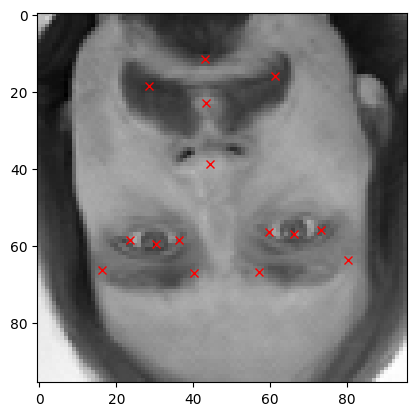

In [34]:
plt.imshow(ver_df['Image'][0], cmap='gray')
#show 'x' red points
for i in range(1, 31, 2):
  plt.plot(ver_df.loc[0][i-1], ver_df.loc[0][i], 'rx')

## PERFORMING DATA NORMALIZATION & taining data
* AUGMENTED Data Frame is in the form of NUMPY Array. So we can't extact images column by
* augmented_df['Image']

In [35]:
# Obtain the value of images which is present in the 31st columns (Since Index start from 0, we refer to 31st column)
img = augmented_df[:, 30]
img

array([array([[238, 236, 237, ..., 250, 250, 250],
              [235, 238, 236, ..., 249, 250, 251],
              [237, 236, 237, ..., 251, 251, 250],
              ...,
              [186, 183, 181, ...,  52,  57,  60],
              [189, 188, 207, ...,  61,  69,  78],
              [191, 184, 184, ...,  70,  75,  90]]),
       array([[219, 215, 204, ...,  92,  88,  84],
              [222, 219, 220, ...,  92,  88,  86],
              [231, 224, 212, ...,  77,  80,  84],
              ...,
              [  1,   1,   1, ...,   1,   1,   1],
              [  1,   1,   1, ...,   1,   1,   1],
              [  1,   1,   1, ...,   1,   1,   1]]),
       array([[144, 142, 159, ..., 208, 207, 207],
              [143, 142, 161, ..., 208, 208, 207],
              [143, 140, 160, ..., 209, 209, 207],
              ...,
              [ 66,  70,  69, ...,  81, 134, 194],
              [ 65,  69,  71, ...,  75,  83, 109],
              [ 65,  68,  70, ...,  78,  78,  77]]), ...,
       array([

**Image Normalization:**
Image normalization is a common preprocessing step in computer vision tasks for several reasons:

1. **Better Model Convergence**: Normalizing pixel values to a fixed range, such as [0, 1] or [-1, 1], can help improve the convergence of optimization algorithms during training. This is because normalizing the input data reduces the scale of input features, which can lead to more stable training dynamics and faster convergence.

2. **Reduced Sensitivity to Scale**: Neural networks can be sensitive to the scale of input features. Normalizing pixel values to a fixed range helps mitigate this sensitivity, making the model more robust to changes in the scale of input data.

3. **Improved Generalization**: Normalizing images can help the model generalize better to unseen data by reducing the impact of variations in pixel intensity across different images. This can lead to better performance on validation and test sets.

4. **Avoiding Saturation**: Neural networks often use activation functions like sigmoid or tanh, which saturate at extreme values. By normalizing pixel values to a fixed range, you can avoid saturation of these activation functions and ensure that gradients flow effectively during training.

5. **Compatibility with Pretrained Models**: Many pretrained models and architectures, especially those trained on large-scale datasets like ImageNet, expect input images to be normalized in a specific way. By normalizing your input images to match the expectations of these models, you can effectively use transfer learning and leverage pretrained weights for your own tasks.

Overall, image normalization is a simple yet effective preprocessing technique that can improve the stability, convergence, and generalization of neural network models in computer vision tasks.

In [36]:
# Normalize the images
img = img / 255       # dividing by highest pixel

# create an empty array of shape (x, 96, 96, 1) to feed the model
img

array([array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.98039216, 0.98039216,
               0.98039216],
              [0.92156863, 0.93333333, 0.9254902 , ..., 0.97647059, 0.98039216,
               0.98431373],
              [0.92941176, 0.9254902 , 0.92941176, ..., 0.98431373, 0.98431373,
               0.98039216],
              ...,
              [0.72941176, 0.71764706, 0.70980392, ..., 0.20392157, 0.22352941,
               0.23529412],
              [0.74117647, 0.7372549 , 0.81176471, ..., 0.23921569, 0.27058824,
               0.30588235],
              [0.74901961, 0.72156863, 0.72156863, ..., 0.2745098 , 0.29411765,
               0.35294118]])                                                   ,
       array([[0.85882353, 0.84313725, 0.8       , ..., 0.36078431, 0.34509804,
               0.32941176],
              [0.87058824, 0.85882353, 0.8627451 , ..., 0.36078431, 0.34509804,
               0.3372549 ],
              [0.90588235, 0.87843137, 0.83137255, ..., 0.301960

In [37]:
# Create an empty array of shape(x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the img list and add image values to the empty aray after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
  X[i, ] = np.expand_dims(img[i], axis=2)

# Convert the images to float32 to ensure division results in float values
X = np.array(X).astype(np.float32)

In [38]:
X.shape

(6420, 96, 96, 1)

In [39]:
# Obtain the values of x and y co-ordinates which are used as target
y = augmented_df[:, :30]      # excluding 31st column
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [40]:
#X[0][0].shape

**TRAIN & TEST: SPLIT DATA**
* X_test and X_train: INput for testing and training data
* y_test and y_train: Output fo testing and taining data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(5136, 96, 96, 1)

In [43]:
X_test.shape

(1284, 96, 96, 1)

In [44]:
y_test.shape

(1284, 30)

### BUILDING DEEP RESIDUAL NEURAL NETWORK KEY FACIAL POINTS DETECTION MODEL

![alt text](https://drive.google.com/uc?id=1q0If_tsIyz2GfOb9EsRH_8_ue-1QnTlu)

![alt text](https://drive.google.com/uc?id=1GDhehqRRtnTA3-i02cYcalbPA27ej7Ar)

**Creating RES-BLOCK**
* 1. CONVOLUTION BLOCK
* 2. IDENTITY BLOCK
* 3. IDENTITY BLOCK

Let's first create CONVOLUTION BLOCK

In [45]:
def res_block(X, filter, stage):

  ##CONVOLUTION BLOCK
  X_copy = X
  f1, f2, f3 = filter

  #main path ---------------------------------------PART 1
  # 1. Conv2D
  # padding valid : default padding
  X= Conv2D(f1, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)

  #2. MaxPool2D
  X = MaxPool2D(pool_size=(2,2))(X)

  #3. BatchNorm, Relu
  X = BatchNormalization(axis=3, name="bn_"+str(stage)+"_conv_a")(X)
  X = Activation('relu')(X)

  #4. Conv2D - kernel(3*3)
  # Padding same : In this type of padding, we only append zero to the left of the array and to the top of the 2D input matrix.
  X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)

  #5. BatchNorm, Relu
  X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  #6. Conv2D
  X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_c')(X)



  #short path ---------------------------------------PART 2
  #1. Conv2D
  X_copy = Conv2D(f3, (1,1), (1,1), name='res_'+str(stage)+'_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)

  #2. MaxPool2D
  X_copy = MaxPool2D(pool_size=(2,2))(X_copy)

  #3. BatchNorm
  X_copy = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADDING BOTH PATH
  X = Add()([X, X_copy])
  X = Activation('relu')(X)



  ##IDENTITY BLOCK 1
  X_copy = X

  #main path
  #1. Conv2D
  X = Conv2D(f1, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_identity_1_a', kernel_initializer=glorot_uniform(seed =0))(X)

  #2. BatchNorm, relu
  X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  #3. Conv2D - kernel(3*3)
  X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_identity_1_b', kernel_initializer=glorot_uniform(seed=0))(X)

  #4. BatchNorm, relu
  X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  #5. Conv2D
  X = Conv2D(f3, (1,1), (1,1), name='res_'+str(stage)+'_identity_1_c', kernel_initializer=glorot_uniform(seed=0))(X)

  #6. BatchNorm
  X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_c')(X)

  # Add
  X = Add()([X, X_copy])
  X = Activation('relu')(X)


  ##IDENTITY BLOCK 2
  X_copy = X

  #main path
  #1. Conv2D
  X = Conv2D(f1, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_identity_2_a', kernel_initializer=glorot_uniform(seed=0))(X)
  #2. BatchNorm, relu
  X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  #3. Conv2D -kernel(3*3)
  X = Conv2D(f2, (3,3), (1,1), padding='same', name='res_'+str(stage)+'_identity_2_b', kernel_initializer=glorot_uniform(seed=0))(X)
  #4. BatchNOrm, relu
  X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  #5. Conv2D
  X = Conv2D(f3, (1,1), (1,1), name='res_'+str(stage)+'_identity_2_c', kernel_initializer=glorot_uniform(seed=0))(X)
  #6. BatchNorm
  X = BatchNormalization(axis = 3, name='bn_'+str(stage)+'_identity_2_c')(X)

  # Add
  X = Add()([X, X_copy])
  A = Activation('relu')(X)

  return X

![alt text](https://drive.google.com/uc?id=1G_gvfoKJyRGpq_oNejLwDj7ZxIZvCGk6)

### Creating FINAL MODEL

In [46]:
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model


input_shape = (96,96,1)

#1. Input Tensor shape
X_input = Input(input_shape)

#2. ZeroPadding
X = ZeroPadding2D((3,3))(X_input)

#3. Conv2D, BatchNOrm, MaxPool2D
X = Conv2D(64, kernel_size=(7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis=3, name= 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

#4. RES_BLOCK
X = res_block(X, filter=[64, 64, 256], stage=2)
X = res_block(X, filter= [128, 128, 512], stage=3)

#5. AveragePooling2D
X = AveragePooling2D((2,2), name='Average_Pooling')(X)

#6. Final Layer(Flatten(), [Dense Layer-Relu, Dropout]*2, Dense Layer-Relu)
X =Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)

X = Dense(2048, activation='relu')(X)
X = Dropout(0.1)(X)

X = Dense(30, activation = 'relu')(X)



model_1_facialKeyPoints = Model(inputs = X_input, outputs=X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

In [47]:
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

### COMPLIE & TRAIN KEY FACIAL POINTS DETECTION deep learning model

* adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    name='adam'
  )

In [48]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    name='adam'
  )
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer=adam, metrics=['accuracy'])

In [49]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
# earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='FacialKeyPoints_weight.h5', mode = 'min', verbose=1, save_best_only=True)


In [50]:
history1 = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.01, callbacks=[checkpointer])

Epoch 1/100
159/159 [==============================] - ETA: 0s - loss: 258.5385 - accuracy: 0.5708
Epoch 1: val_loss improved from inf to 878.35742, saving model to FacialKeyPoints_weight.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


159/159 [==============================] - 46s 167ms/step - loss: 258.5385 - accuracy: 0.5708 - val_loss: 878.3574 - val_accuracy: 0.7885
Epoch 2/100
157/159 [============================>.] - ETA: 0s - loss: 87.1161 - accuracy: 0.5947
Epoch 2: val_loss improved from 878.35742 to 394.53519, saving model to FacialKeyPoints_weight.h5
159/159 [==============================] - 5s 32ms/step - loss: 86.9995 - accuracy: 0.5942 - val_loss: 394.5352 - val_accuracy: 0.7885
Epoch 3/100
159/159 [==============================] - ETA: 0s - loss: 59.7385 - accuracy: 0.5879
Epoch 3: val_loss improved from 394.53519 to 222.98119, saving model to FacialKeyPoints_weight.h5
159/159 [==============================] - 5s 31ms/step - loss: 59.7385 - accuracy: 0.5879 - val_loss: 222.9812 - val_accuracy: 0.7885
Epoch 4/100
159/159 [==============================] - ETA: 0s - loss: 44.3869 - accuracy: 0.5917
Epoch 4: val_loss improved from 222.98119 to 92.61361, saving model to FacialKeyPoints_weight.h5
159/1

In [51]:
# save the model architecture to json file for future use

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json", "w") as json_file:
  json_file.write(model_json)


## ASSESS TRANIED KEY FACIAL POINTS DETECTION MODEL PERFORMANCE

In [52]:
from keras.models import model_from_json

# Load the model architecture from the JSON file
with open("FacialKeyPoints-model.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Reconstruct the model from the loaded architecture (Loaded_model = model_1_facialKeyPoint ho)
model_1_facialKeyPoints = model_from_json(loaded_model_json)

# Load the trained weights
model_1_facialKeyPoints.load_weights("FacialKeyPoints_weight.h5")

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# Compile the loaded model (if needed)
model_1_facialKeyPoints.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

# Use the loaded model for inference or further training
# For example:
# predictions = model_1_facialKeyPoint.predict(X_test)

In [53]:
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy: {}".format(result[1]))

41/41 [==============================] - 1s 18ms/step - loss: 57.1765 - accuracy: 0.6986
Accuracy: 0.6985981464385986


So, Here we got the accuracy of 74.143% on unseen testing data which is pretty good.
# Grid Search CV
### How to increase accuracy rate:
code :
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

- Define the model
- Replace 'model' with your model architecture
model = ...

- Define the parameter grid
param_grid = {'lr': [0.001, 0.01, 0.1]}  # Learning rate values to try

- Define the optimizer
optimizer = Adam()

- Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

- Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

- Train the model
grid_search.fit(X_train, y_train)

- Get the best parameters
best_lr = grid_search.best_params_['lr']

- Use the best learning rate to train the model
optimizer = Adam(learning_rate=best_lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.01)

- Evaluate on test data
result = model.evaluate(X_test, y_test)
print("Accuracy: {}".format(result[1]))



In [54]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
np.max(history1.history['accuracy'])

0.7594413757324219

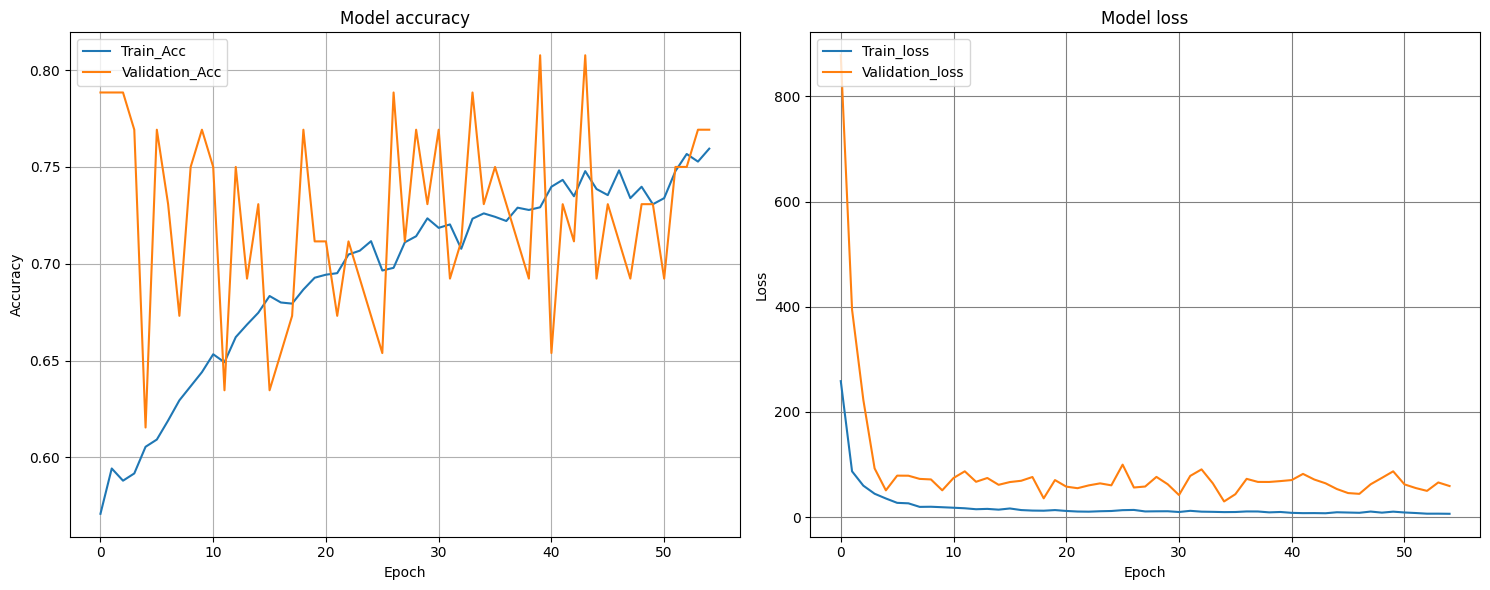

In [56]:
# Create subplots with 1 rows and 2 column
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# Plot training & validation accuracy values
axes[0].plot(history1.history['accuracy'])
axes[0].plot(history1.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train_Acc', 'Validation_Acc'], loc='upper left')
axes[0].grid(True)

# Subplot for loss
axes[1].plot(history1.history['loss'])
axes[1].plot(history1.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train_loss', 'Validation_loss'], loc='upper left')
axes[1].grid(True, color='gray')

# Adjust layout to prevent overlap
plt.tight_layout()

In [57]:
#!pip install tensorflow scikit-learn

In [58]:
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam


# # Define a function to create the Keras model
# def create_model(lr=0.01):
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(input_shape,)),  # Replace input_shape with your input shape
#         Dense(32, activation='relu'),
#         Dense(num_classes, activation='softmax')  # Replace num_classes with the number of output classes
#     ])
#     optimizer = Adam(learning_rate=lr)
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Define the parameter grid
# param_grid = {'lr': [0.001, 0.01, 0.1]}  # Learning rate values to try

# # Create the Keras model
# keras_model = KerasClassifier(build_fn=create_model, verbose=0)

# # Define GridSearchCV
# grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)

# # Train the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_lr = grid_search.best_params_['lr']

# # Use the best learning rate to train the model
# best_model = create_model(lr=best_lr)
# history = best_model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.01)

# # Evaluate on test data
# result = best_model.evaluate(X_test, y_test)
# print("Accuracy: {}".format(result[1]))


In [59]:
#!pip install --upgrade --force-reinstall keras



**=================================================PART -2=======================================================**


### **FACIAL EXPRESSION(EMOTIOIN) DETECTION**

- DATA importing

In [60]:
facial_df = pd.read_csv('icml_face_data.csv')

In [61]:
facial_df.head()

emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3        2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...

In [62]:
# @title null value
facial_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [63]:
facial_df.describe()

emotion
count  24568.000000
mean       2.266200
std        1.332423
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000

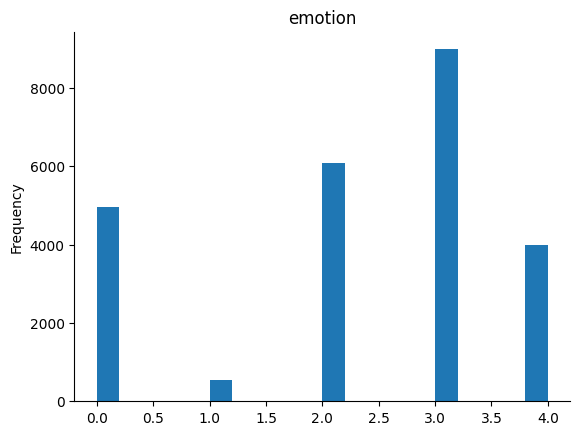

In [64]:
# @title emotion

from matplotlib import pyplot as plt
facial_df['emotion'].plot(kind='hist', bins=20, title='emotion')
plt.gca().spines[['top', 'right',]].set_visible(False)

**String -> array**
Everything all right. Let's convert string pixel into array format

In [65]:
facial_df[' pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3        20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4        77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
                               ...                        
24563    0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564    181 177 176 156 178 144 136 132 122 107 131 16...
24565    178 174 172 173 181 188 191 194 196 199 200 20...
24566    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
Name:  pixels, Length: 24568, dtype: object

In [66]:
facial_df['emotion'].shape

(24568,)

In [67]:
# function to convert pixel values in string format to array format
def string2array(x):
  return np.array(x.split(' ')).reshape(48,48,1).astype('float32')

In [68]:
# function to resize images from (48, 48) to (96, 96)
def resize(x):
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96,96), interpolation=cv2.INTER_LINEAR)

In [69]:
facial_df[' pixels'] = facial_df[' pixels'].apply(lambda x: string2array(x))

In [70]:
facial_df[' pixels'] = facial_df[' pixels'].apply(lambda x: resize(x))

In [71]:
facial_df.head(5)

emotion                                             pixels
0        0  [[70.0, 72.5, 77.5, 80.5, 81.5, 79.5, 74.5, 68...
1        0  [[151.0, 150.75, 150.25, 149.25, 147.75, 149.0...
2        2  [[24.0, 26.0, 30.0, 33.0, 35.0, 34.5, 31.5, 30...
3        2  [[20.0, 19.25, 17.75, 17.5, 18.5, 19.5, 20.5, ...
4        3  [[77.0, 77.25, 77.75, 78.25, 78.75, 79.0, 79.0...

In [72]:
facial_df.columns

Index(['emotion', ' pixels'], dtype='object')

In [73]:
# @title rename column
facial_df = facial_df.rename(columns={' pixels': 'pixels'})

In [74]:
facial_df.columns

Index(['emotion', 'pixels'], dtype='object')

**Visualize the any image in the dataframe**

The image will be low pixels because we have converted it into (96,96) from low pixels value (48,48).

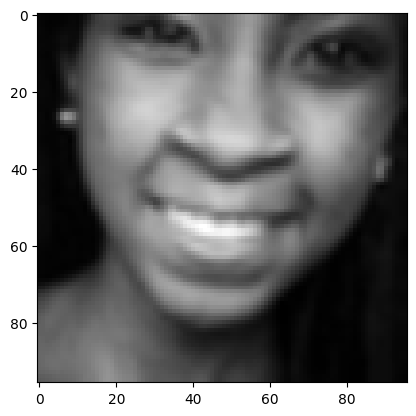

In [75]:
plt.imshow(facial_df['pixels'].iloc[-1], cmap='gray')

### **VISUALIZE IMAGES AND PLOT LABELS**

In [76]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4:'surprise'}

In [77]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
    pass

In [78]:
# @title Index Y-Axis
facial_df.emotion.value_counts().index

Index([3, 2, 0, 4, 1], dtype='int64', name='emotion')

In [79]:
# @title Data X-Axis
facial_df['emotion'].value_counts()

emotion
3    8989
2    6077
0    4953
4    4002
1     547
Name: count, dtype: int64

Text(0, 0.5, 'No.of Samples')

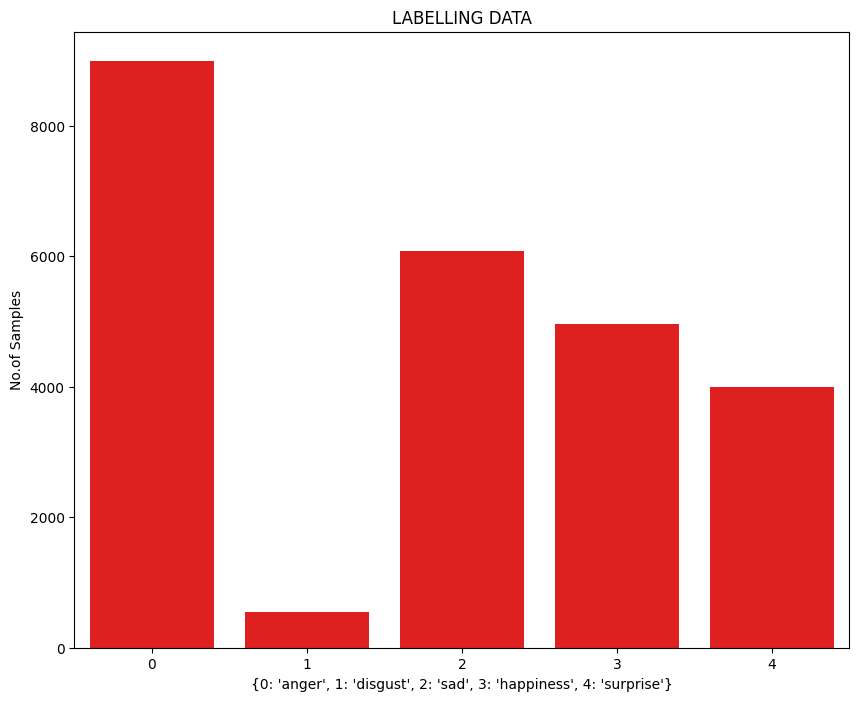

In [80]:
# @title BarPlot
plt.figure(figsize=(10,8))
sns.barplot(y= facial_df.emotion.value_counts(),x=facial_df.emotion.unique(), color='red')
plt.title("LABELLING DATA")
plt.xlabel(label_to_text)
plt.ylabel("No.of Samples")

**Here, the sample data for *Label:1:Disgust* is very Low. The model will not be benefitted from this. Less data means low reading and less efficient model.**

## **PERFORM IMAGE AUGMENTATION & DATA  PREPERATIONt**

In [81]:
# split the dataframe
from keras.utils import to_categorical

X = facial_df['pixels']
y = facial_df['emotion']

In [82]:
y = to_categorical(y)

In [83]:
y[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [84]:
X[0]

array([[ 70.    ,  72.5   ,  77.5   , ...,  42.5   ,  41.5   ,  41.    ],
       [ 68.75  ,  70.375 ,  73.625 , ...,  44.375 ,  42.625 ,  41.75  ],
       [ 66.25  ,  66.125 ,  65.875 , ...,  48.125 ,  44.875 ,  43.25  ],
       ...,
       [ 77.    ,  77.625 ,  78.875 , ...,  73.5625,  61.1875,  55.    ],
       [ 77.    ,  76.375 ,  75.125 , ...,  92.6875,  79.5625,  73.    ],
       [ 77.    ,  75.75  ,  73.25  , ..., 102.25  ,  88.75  ,  82.    ]],
      dtype=float32)

In [85]:
# Stack : each element of X is an array of the same shape, and it stacks them along the new axis to create a new array.The resulting array X would have one additional dimension compared to the original arrays in X.
X = np.stack(X, axis=0)
X = X.reshape(24568, 96, 96, 1)

In [86]:
print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


(24568, 96, 96, 1): This show, there are 24k images having 96 * 96 pixels with only 1 color channel.

In [87]:
# Train, Test and Validation dataSet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) # training : 80%, test : 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)   # validation : 50% of test, test : 50% of test

**Shuffle:**shuffle determines whether the data should be shuffled before splitting it into training and testing sets.
* In most cases, setting shuffle to True is recommended, as it helps in producing more robust and generalizable models by preventing any biases introduced by the original order of the data.

In [88]:
print(X_val.shape, y_val.shape)

(2457, 96, 96, 1) (2457, 5)


In [89]:
print(X_test.shape, y_test.shape)

(2457, 96, 96, 1) (2457, 5)


In [90]:
print(X_train.shape, y_train.shape)

(19654, 96, 96, 1) (19654, 5)


In [91]:
(24568 - 24568 * 0.8) / 2 # validation & test data

2456.7999999999993

In [92]:
# @title image-processing : Image Normalization ranges(0-1)
X_train = X_train/255
X_val = X_val / 255
X_test = X_test / 255

**CODE:**
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image

* Load an image
image = np.array(Image.open("example_image.jpg"))

* Define the cutout augmentation
augmenter = iaa.Cutout(nb_iterations=(1, 5), size=(0.1, 0.2), squared=False)

* Apply augmentation to the image
augmented_image = augmenter(image=image)

* Plot the original and augmented images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(augmented_image)
axes[1].set_title("Augmented Image with Cutout")
axes[1].axis("off")
plt.show()


In [93]:
X_train[0]

array([[[0.03529412],
        [0.04019608],
        [0.05      ],
        ...,
        [0.7735294 ],
        [0.79901963],
        [0.8117647 ]],

       [[0.03333334],
        [0.03970588],
        [0.05245098],
        ...,
        [0.63480395],
        [0.65931374],
        [0.67156863]],

       [[0.02941176],
        [0.03872549],
        [0.05735294],
        ...,
        [0.35735294],
        [0.37990198],
        [0.39117646]],

       ...,

       [[0.05490196],
        [0.05367647],
        [0.05122549],
        ...,
        [0.08406863],
        [0.08357843],
        [0.08333334]],

       [[0.0627451 ],
        [0.05906863],
        [0.05171569],
        ...,
        [0.08357843],
        [0.08995098],
        [0.09313726]],

       [[0.06666667],
        [0.06176471],
        [0.05196078],
        ...,
        [0.08333334],
        [0.09313726],
        [0.09803922]]], dtype=float32)

In [94]:
train_datagen = ImageDataGenerator(
    rotation_range =15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

## **BUILD AND TRAIN DEEP LEARNING MODEL FOR FACIAL EXPRESSION CLASSIFICATION**
 **Resnet18 or 50**
 * ResNet-18 is a shallower and lighter model, suitable for tasks where computational resources are limited or when a simpler model architecture suffices. On the other hand, ResNet-50 is deeper and more powerful, offering higher capacity and potentially better performance on complex tasks and larger datasets, albeit at the cost of increased computational requirements and training time.








In [95]:
input_shape = (96, 96, 1)

# input tensor shape
X_input = Input(shape=input_shape)

# Zero padding
X = ZeroPadding2D((3,3))(X_input)

# 1st Stage
X = Conv2D(64, (7,7), strides = (2,2), name = 'conv1', kernel_initializer = glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis = 3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D(pool_size=(3,3), strides=(2,2))(X)

# 2nd stage
X = res_block(X, filter=[64, 64, 256], stage=2)

# 3rd stage
X = res_block(X, filter=(128, 128, 512), stage=3)

# Average Pooling
X = AveragePooling2D(pool_size=(4,4), name='Average_Pooling')(X)

# Final Layer
X = Flatten()(X)
X = Dense(units=5, activation='softmax', name= 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)
# Here, in Dense layer, we only provide 5 output as we have in the data as emotion type

model_2_emotion = Model(inputs= X_input, outputs= X, name='Resnet18')
model_2_emotion.summary()



Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 102, 102, 1)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d_1[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']        

### COMPLIE & TRAIN KEY FACIAL POINTS DETECTION deep learning model


In [96]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    name='adam'
  )
model_2_emotion.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ['accuracy'])

**Early Stopping:**
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=5,          # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

* monitor='val_loss': This indicates that the validation loss will be monitored for early stopping. Training will stop if the validation loss stops decreasing.

* restore_best_weights=True: This ensures that the model weights are restored to the best observed weights during training when training is stopped early. It helps prevent overfitting by reverting to the model state that performed best on the validation set.

* The .h5 extension is commonly used for saving models in HDF5 format, which is a popular file format for storing large numerical datasets. The .keras extension could be used to indicate that the file contains a model saved using Keras, but it's not a standard convention.

In [97]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (Patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience=20, restore_best_weights=True)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.h5", monitor='val_loss', mode='min',  verbose=1 , save_best_only = True)

In [98]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), steps_per_epoch=len(X_train)//64, epochs= 100, callbacks=[checkpointer, earlystopping])

Epoch 1/100
307/307 [==============================] - ETA: 0s - loss: 1.4062 - accuracy: 0.4222
Epoch 1: val_loss improved from inf to 1.74370, saving model to FacialExpression_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


307/307 [==============================] - 55s 137ms/step - loss: 1.4062 - accuracy: 0.4222 - val_loss: 1.7437 - val_accuracy: 0.2108
Epoch 2/100
307/307 [==============================] - ETA: 0s - loss: 1.0956 - accuracy: 0.5552
Epoch 2: val_loss improved from 1.74370 to 1.43278, saving model to FacialExpression_weights.h5
307/307 [==============================] - 16s 53ms/step - loss: 1.0956 - accuracy: 0.5552 - val_loss: 1.4328 - val_accuracy: 0.4098
Epoch 3/100
307/307 [==============================] - ETA: 0s - loss: 0.9804 - accuracy: 0.6057
Epoch 3: val_loss improved from 1.43278 to 1.26560, saving model to FacialExpression_weights.h5
307/307 [==============================] - 17s 54ms/step - loss: 0.9804 - accuracy: 0.6057 - val_loss: 1.2656 - val_accuracy: 0.4278
Epoch 4/100
307/307 [==============================] - ETA: 0s - loss: 0.8917 - accuracy: 0.6516
Epoch 4: val_loss did not improve from 1.26560
307/307 [==============================] - 15s 50ms/step - loss: 0.891

In [99]:
# saving the model architecture to json file for future use
model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json", "w") as json_file:
  json_file.write(model_json)

In [102]:
# Load the model architecture from the JSON file
with open("FacialExpression-model.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Reconstruct the model from the loaded architecture (Loaded_model = model_1_facialKeyPoint ho)
model_2_emotion = model_from_json(loaded_model_json)

# Load the trained weights
model_2_emotion.load_weights("FacialExpression_weights.h5")

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# Compile the loaded model (if needed)
model_2_emotion.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Use the loaded model for inference or further training
# For example:
# predictions = model_1_facialKeyPoint.predict(X_test)

In [103]:
score = model_2_emotion.evaluate(X_test, y_test)
print("Test Accuracy: ", score[1])

77/77 [==============================] - 1s 8ms/step - loss: 0.5725 - accuracy: 0.7875
Test Accuracy:  0.7875458002090454


In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

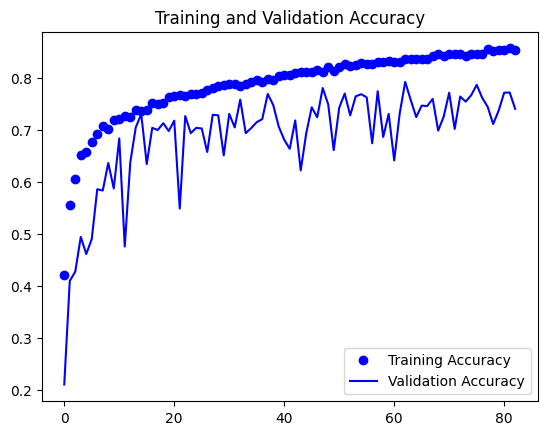

In [107]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

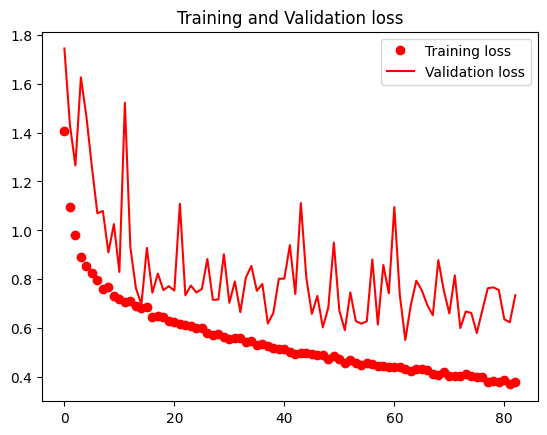

In [108]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [109]:
# Y predictioin values by the model 2
y_pred = np.argmax(model_2_emotion.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis = -1)

77/77 [==============================] - 1s 6ms/step


In [110]:
y_true.shape

(2457,)

<Axes: >

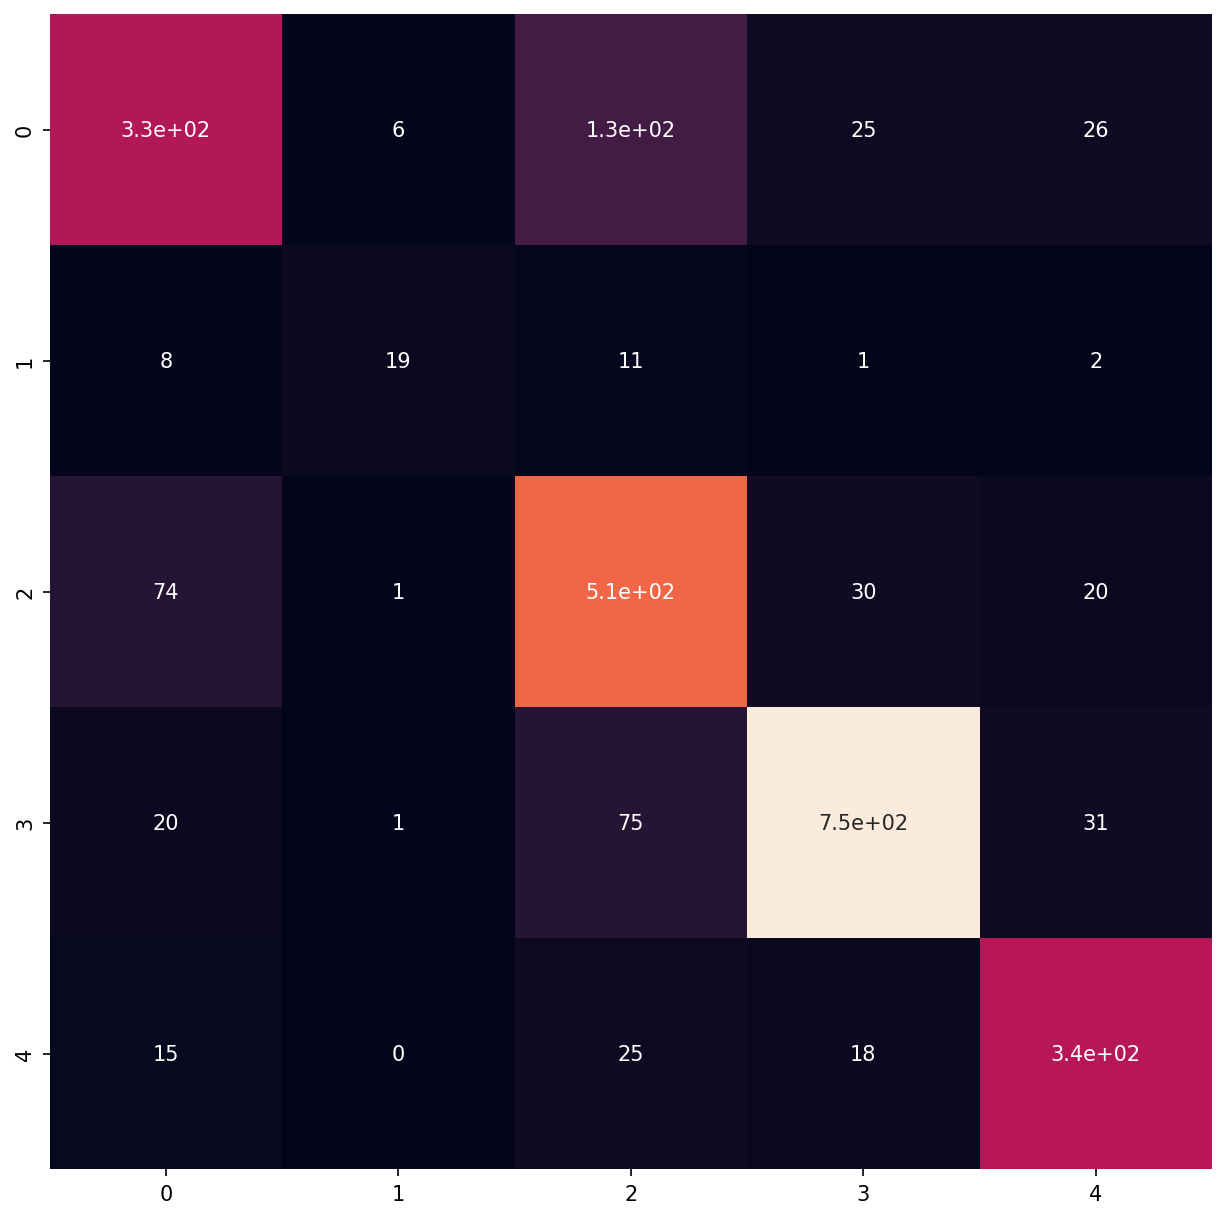

In [111]:
# Heat Map
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,10), dpi=150)
sns.heatmap(cm, annot=True, cbar=False)

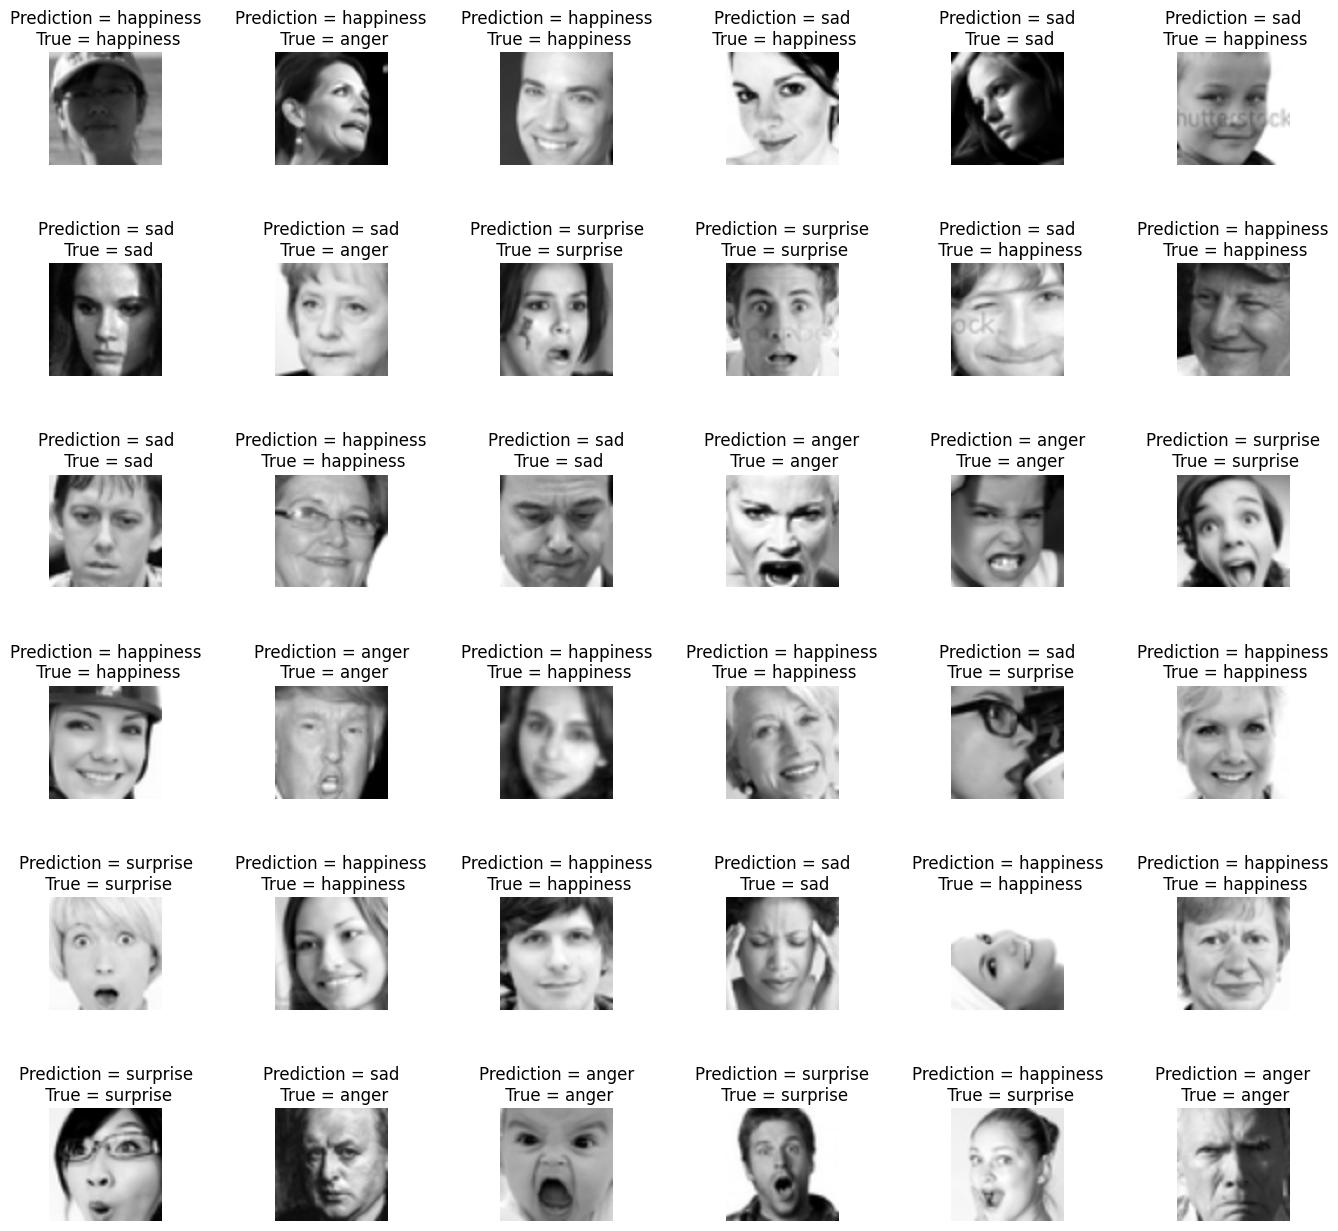

In [115]:
# print out a grid of 36 images along with Pred/True label
# Print out the classification report and analyse precision and recall

len = 6
hgt = 6

fig, axes = plt.subplots(len, hgt, figsize=(16, 16))
axes = axes.ravel()

for i in range(36):
  axes[i].imshow(X_test[i].reshape(96,96), cmap='gray')
  #axes[i].set_title('Prediction: ', label_to_text[y_pred[i]], 'True: ', label_to_text[y_true[i]])
  axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[y_pred[i]], label_to_text[y_true[i]]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [116]:
# Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       517
           1       0.70      0.46      0.56        41
           2       0.67      0.80      0.73       631
           3       0.91      0.85      0.88       873
           4       0.81      0.85      0.83       395

    accuracy                           0.79      2457
   macro avg       0.77      0.72      0.74      2457
weighted avg       0.79      0.79      0.79      2457



*We can clearly see that **label-1** has lowest of recall and F1-score which is 0.46 and 0.56. This is due to the low number of data we train.*

* Less the data, less the machine know about it and lowest will be the accuracy, precision, recall and then obiviously f1-score too.

# **-------------------------------PART - III  ----------------------------------**

## **COMBINE BOTH 'FACIAL EXPRESSION & FACIAL KEYPOINT DETECTION MODEL'**

In [6]:
# @title Combine 1st and 2nd model
# 1st model - model_1_facialKeyPoints
# 2nd model - model_2_emotion

def predict(X_test):

  #making prediction from the KeyPoint model: 1st
  df_facial = model_1_facialKeyPoints(X_test)

  # making prediction from the Emotion model: 2nd
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis=1)

  # Converting the Facial-predictions into a dataframe
  df_predict = pd.DataFrame(df_facial, columns=columns)

  # Adding emotion into the prediction dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [7]:
df_predict = predict(X_test)

NameError: name 'X_test' is not defined

In [8]:
df_predict.head(-10)

NameError: name 'df_predict' is not defined

In [9]:
# @title plot grid of 25 images along with their predicted emotion and facial keypoints

fig, axes = plt.subplots(5,5, figsize=(24,24), dpi=200)
axes = axes.ravel()

for i in range(25):
  axes[i].imshow(X_test[i].squeeze(), cmap='gray')
  axes[i].set_title('Prediction: ', label_to_text[df_predict['emotion'][i]])
  axes[i].axis('off')

  for j in(1,31,2):
    axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

NameError: name 'plt' is not defined